In [41]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

In [42]:
df =pd.read_csv(r'D:\Backup\Old PC\Chandan\Data Science\Internship\Final Project\Phase-1\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df =df.sample(frac =1)
df.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
939,32,Yes,Travel_Rarely,1089,Research & Development,7,2,Life Sciences,1,1309,...,1,80,1,10,3,3,10,4,1,1
705,39,No,Travel_Rarely,903,Sales,2,5,Life Sciences,1,985,...,4,80,0,9,3,3,8,7,0,7
864,41,Yes,Non-Travel,906,Research & Development,5,2,Life Sciences,1,1210,...,1,80,1,5,2,1,1,0,0,0
865,30,No,Travel_Rarely,1329,Sales,29,4,Life Sciences,1,1211,...,3,80,3,8,3,3,4,3,0,3
1289,38,No,Non-Travel,1336,Human Resources,2,3,Human Resources,1,1805,...,4,80,3,13,3,3,11,10,3,8
1077,29,Yes,Travel_Rarely,224,Research & Development,1,4,Technical Degree,1,1522,...,3,80,0,11,2,1,9,7,0,7
1091,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,...,4,80,0,5,2,3,5,3,0,2
834,34,No,Travel_Rarely,1400,Sales,9,1,Life Sciences,1,1163,...,1,80,0,6,3,2,6,5,1,3
90,40,No,Travel_Frequently,530,Research & Development,1,4,Life Sciences,1,119,...,4,80,1,22,3,2,22,3,11,11
1141,30,No,Travel_Rarely,241,Research & Development,7,3,Medical,1,1609,...,2,80,1,6,3,2,6,4,1,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 939 to 1221
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                  1

__Dataset has 35 columns, having data type as int and object.__

In [44]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

__There is no null value present in the data set.__

In [45]:
# Checking duplicate records
print("Duplicate records are :", df.duplicated().sum())

Duplicate records are : 0


__No duplicate record found.__

In [46]:
# checking the data distribution in target column
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [47]:
# Checking percentage of data distribution in target column
print("Percentage of No :", (df['Attrition'].value_counts()[0]/df['Attrition'].value_counts().sum())*100)
print("Percentage of Yes :", (df['Attrition'].value_counts()[1]/df['Attrition'].value_counts().sum())*100)

Percentage of No : 83.87755102040816
Percentage of Yes : 16.122448979591837


__Dataset is imbalance. We will fix it later.__

In [48]:
# Checking statistical summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [49]:
# Checking count of each columns
for i in df:
    print(df[i].value_counts())

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
DailyRate
691     6
329     5
1329    5
530     5
408     5
       ..
307     1
889     1
405     1
1251    1
1238    1
Name: count, Length: 886, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
DistanceFromHome
2     211
1     208
10     86
9      85
7      84
3      84
8      80
5      65
4      64
6      59
1

In [50]:
# Seperating numerical and categorical columns

# Seperating categorical columns
cat_col =[]
for i in df.dtypes.index:
    if df[i].dtype =='object':
        cat_col.append(i)
        
# Seperating numerial columns
num_col =[]
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        num_col.append(i)
        
print("Categorical Columns are :", cat_col)
print("Numerical Columns are :", num_col)

Categorical Columns are : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical Columns are : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [51]:
print("No of Categorical Columns are :", len(cat_col))
print("No of Numerical Columns are :", len(num_col))

No of Categorical Columns are : 9
No of Numerical Columns are : 26


# Data Visualization

### Univariate Analysis

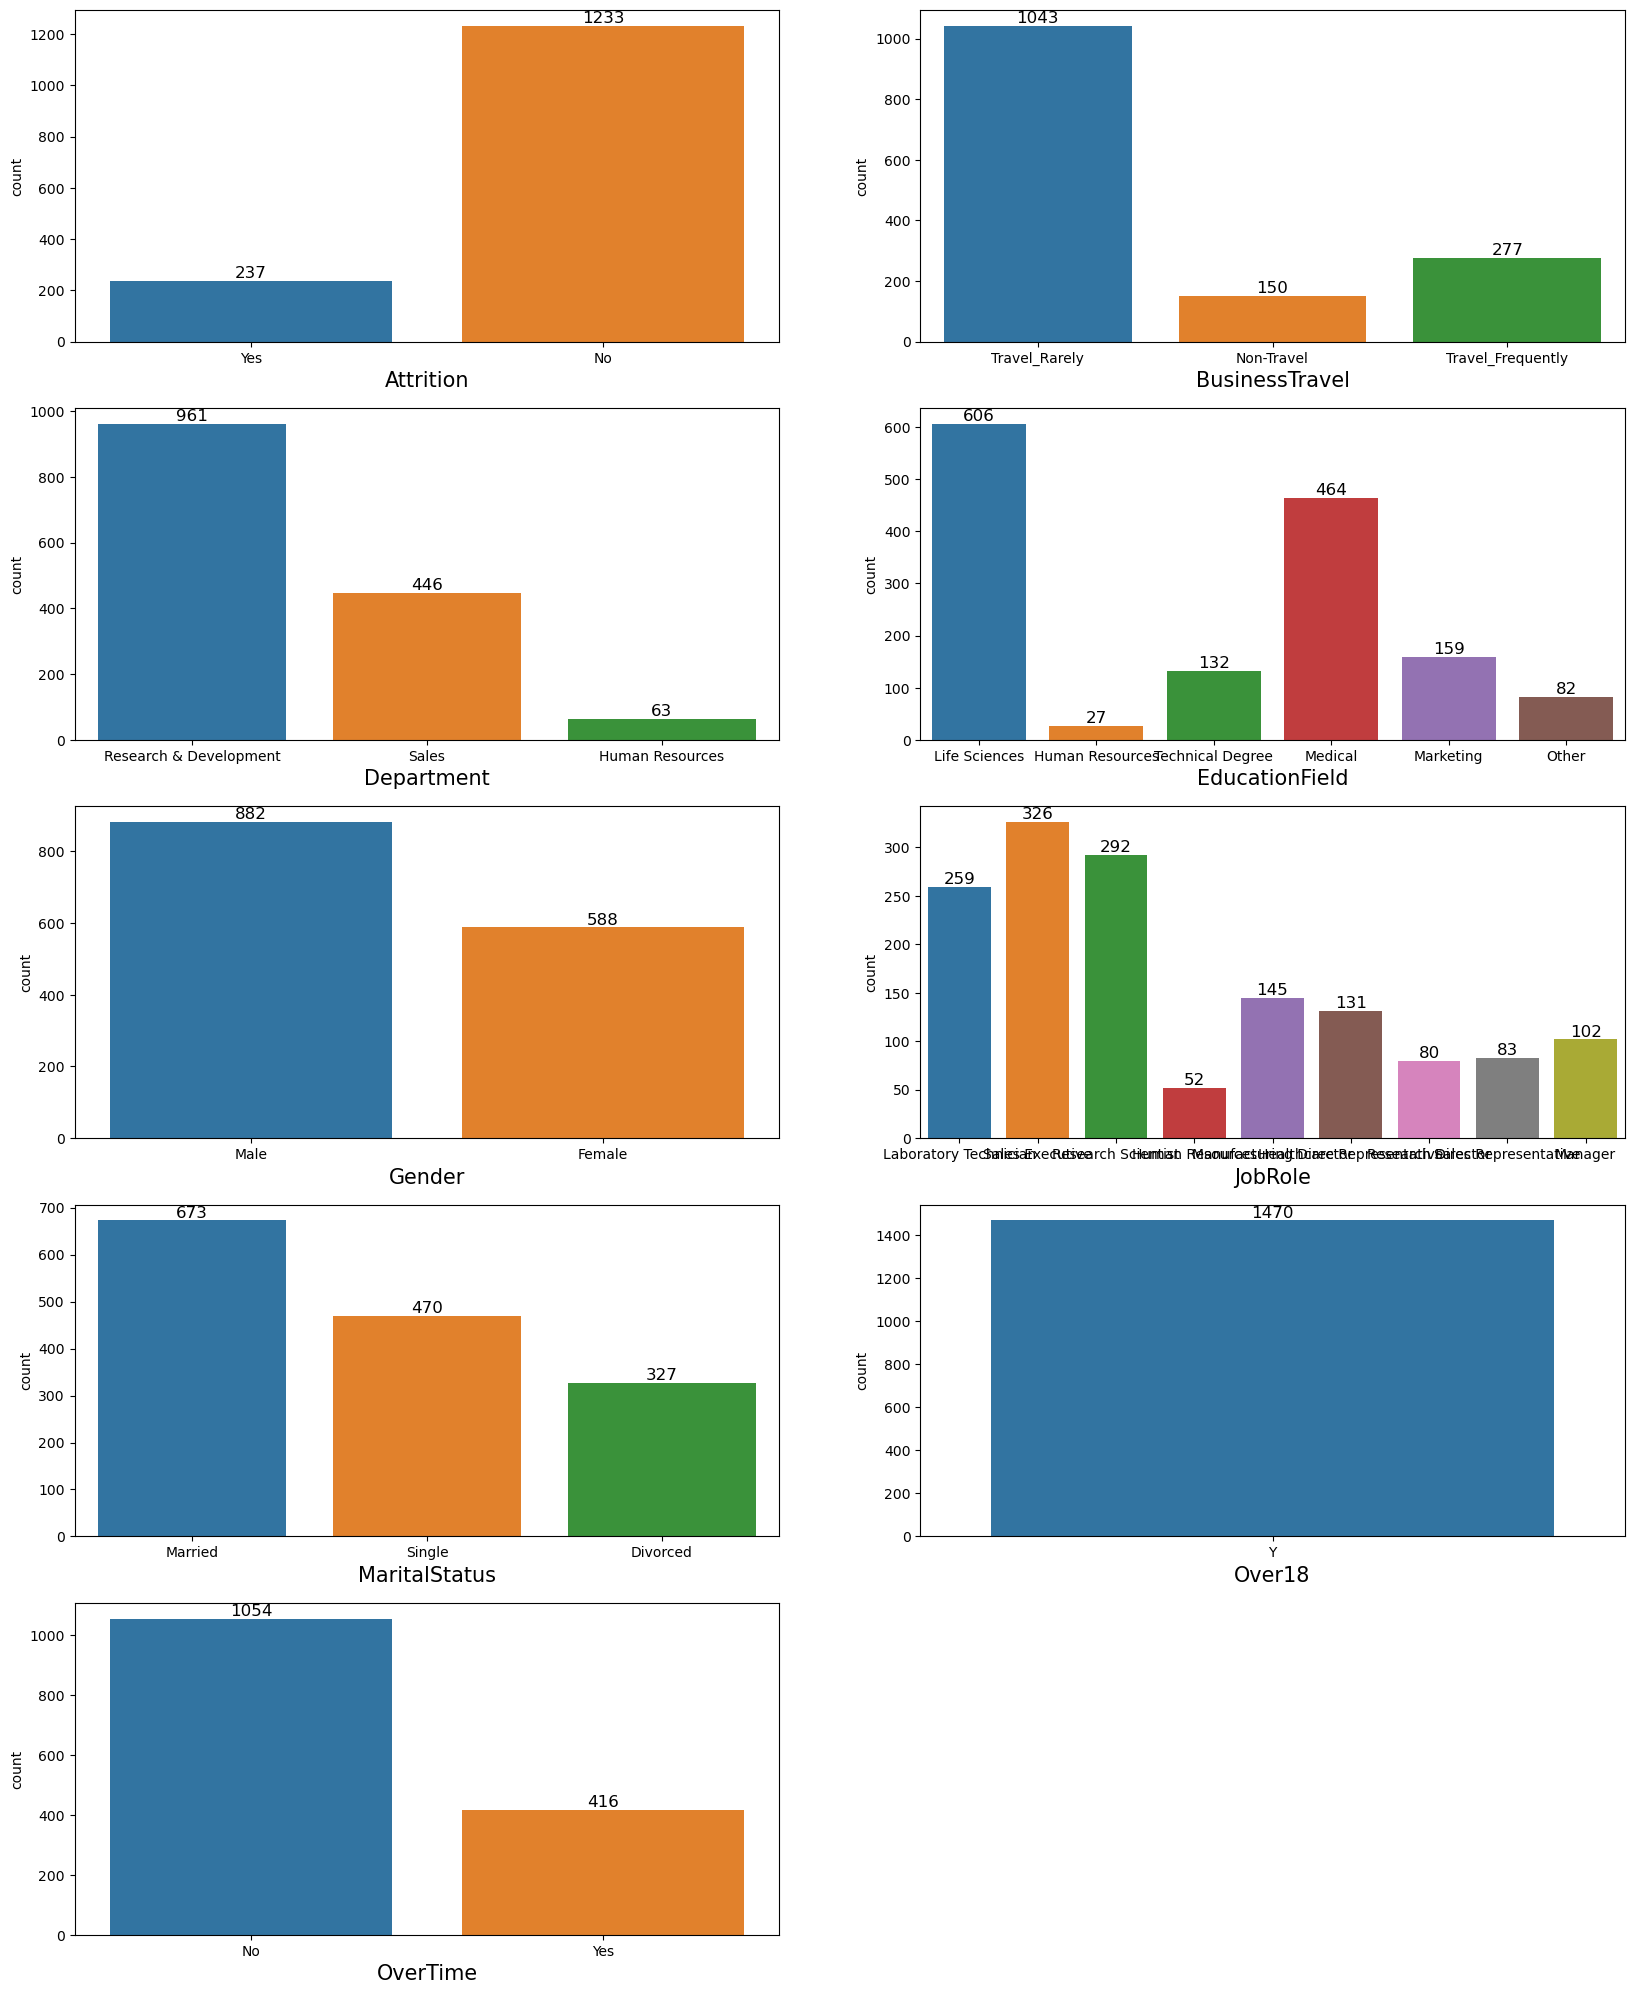

In [52]:
plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_col:
    if plotnumber <=9:
        plt.subplot(5, 2, plotnumber)
        ax =sns.countplot(x =df[i])
        ax.bar_label(ax.containers[0], fontsize =12)
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

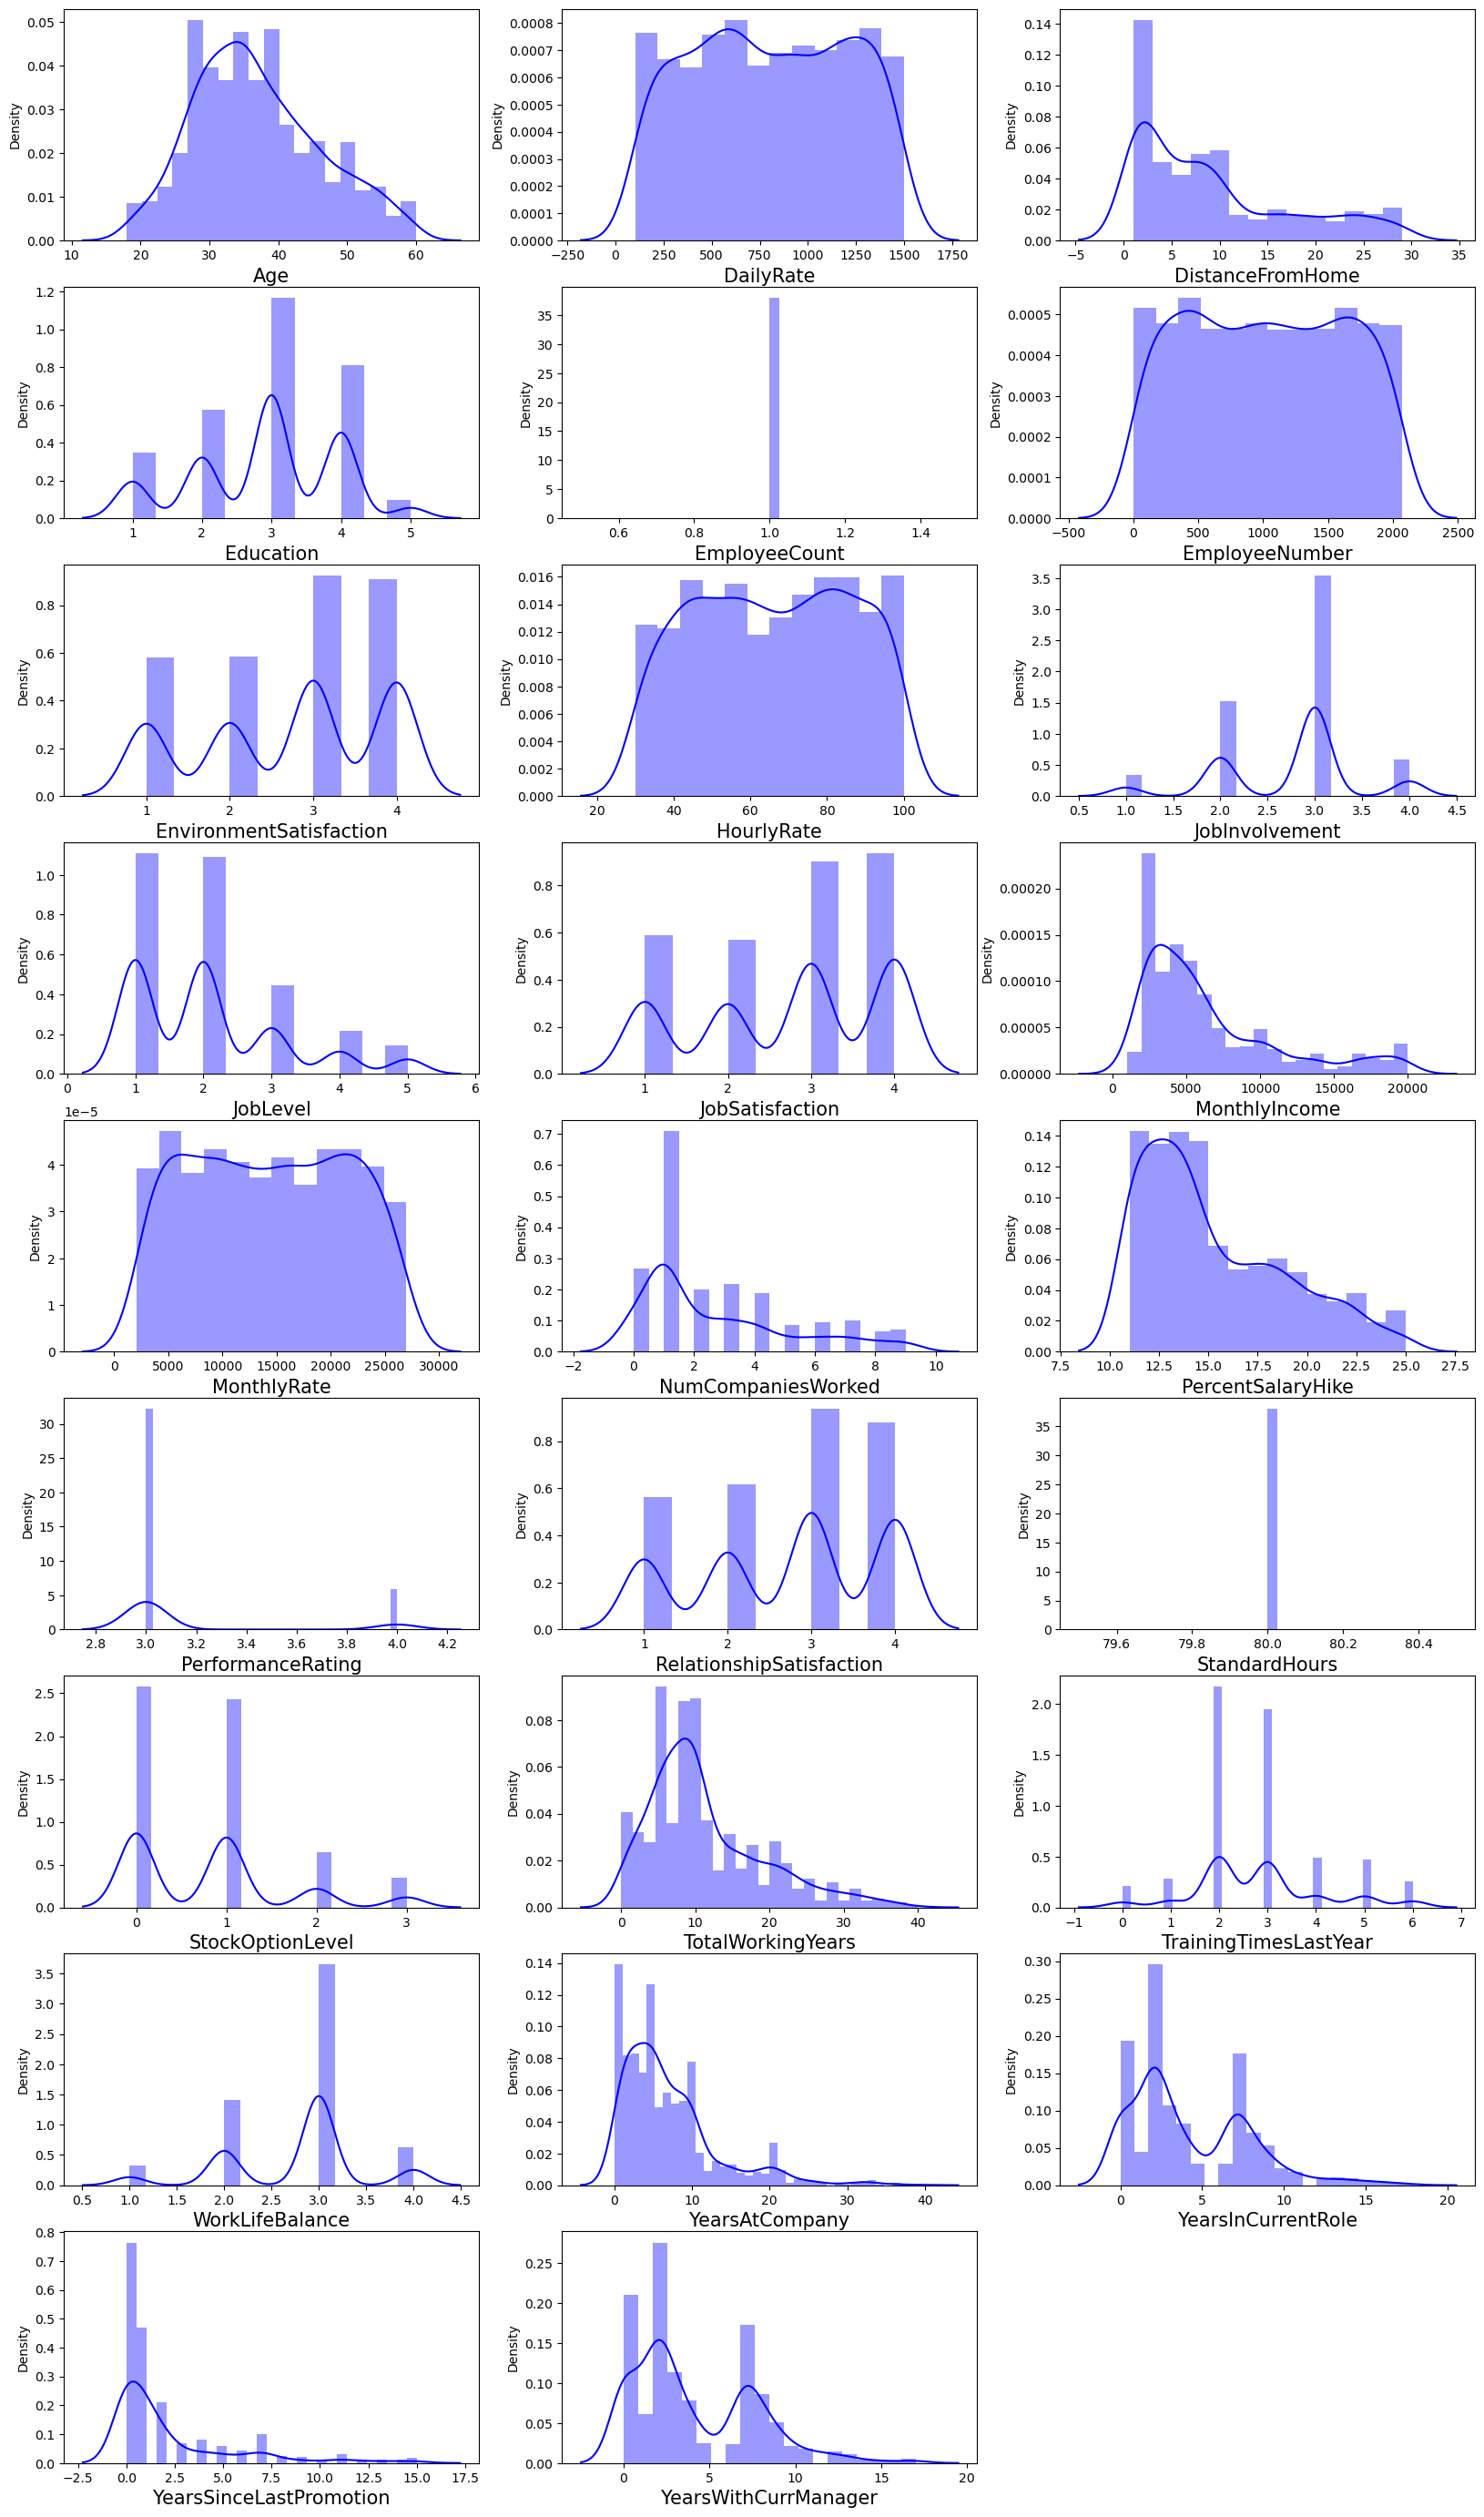

In [53]:
# Checking data distribution for numerical columns
plt.figure(figsize =(20, 35))
plotnumber =1

for i in num_col:
    if plotnumber <= 26:
        plt.subplot(9, 3, plotnumber)
        sns.distplot(df[i], color ='b')
        plt.xlabel(i, fontsize =15)
    plotnumber+=1
plt.show()

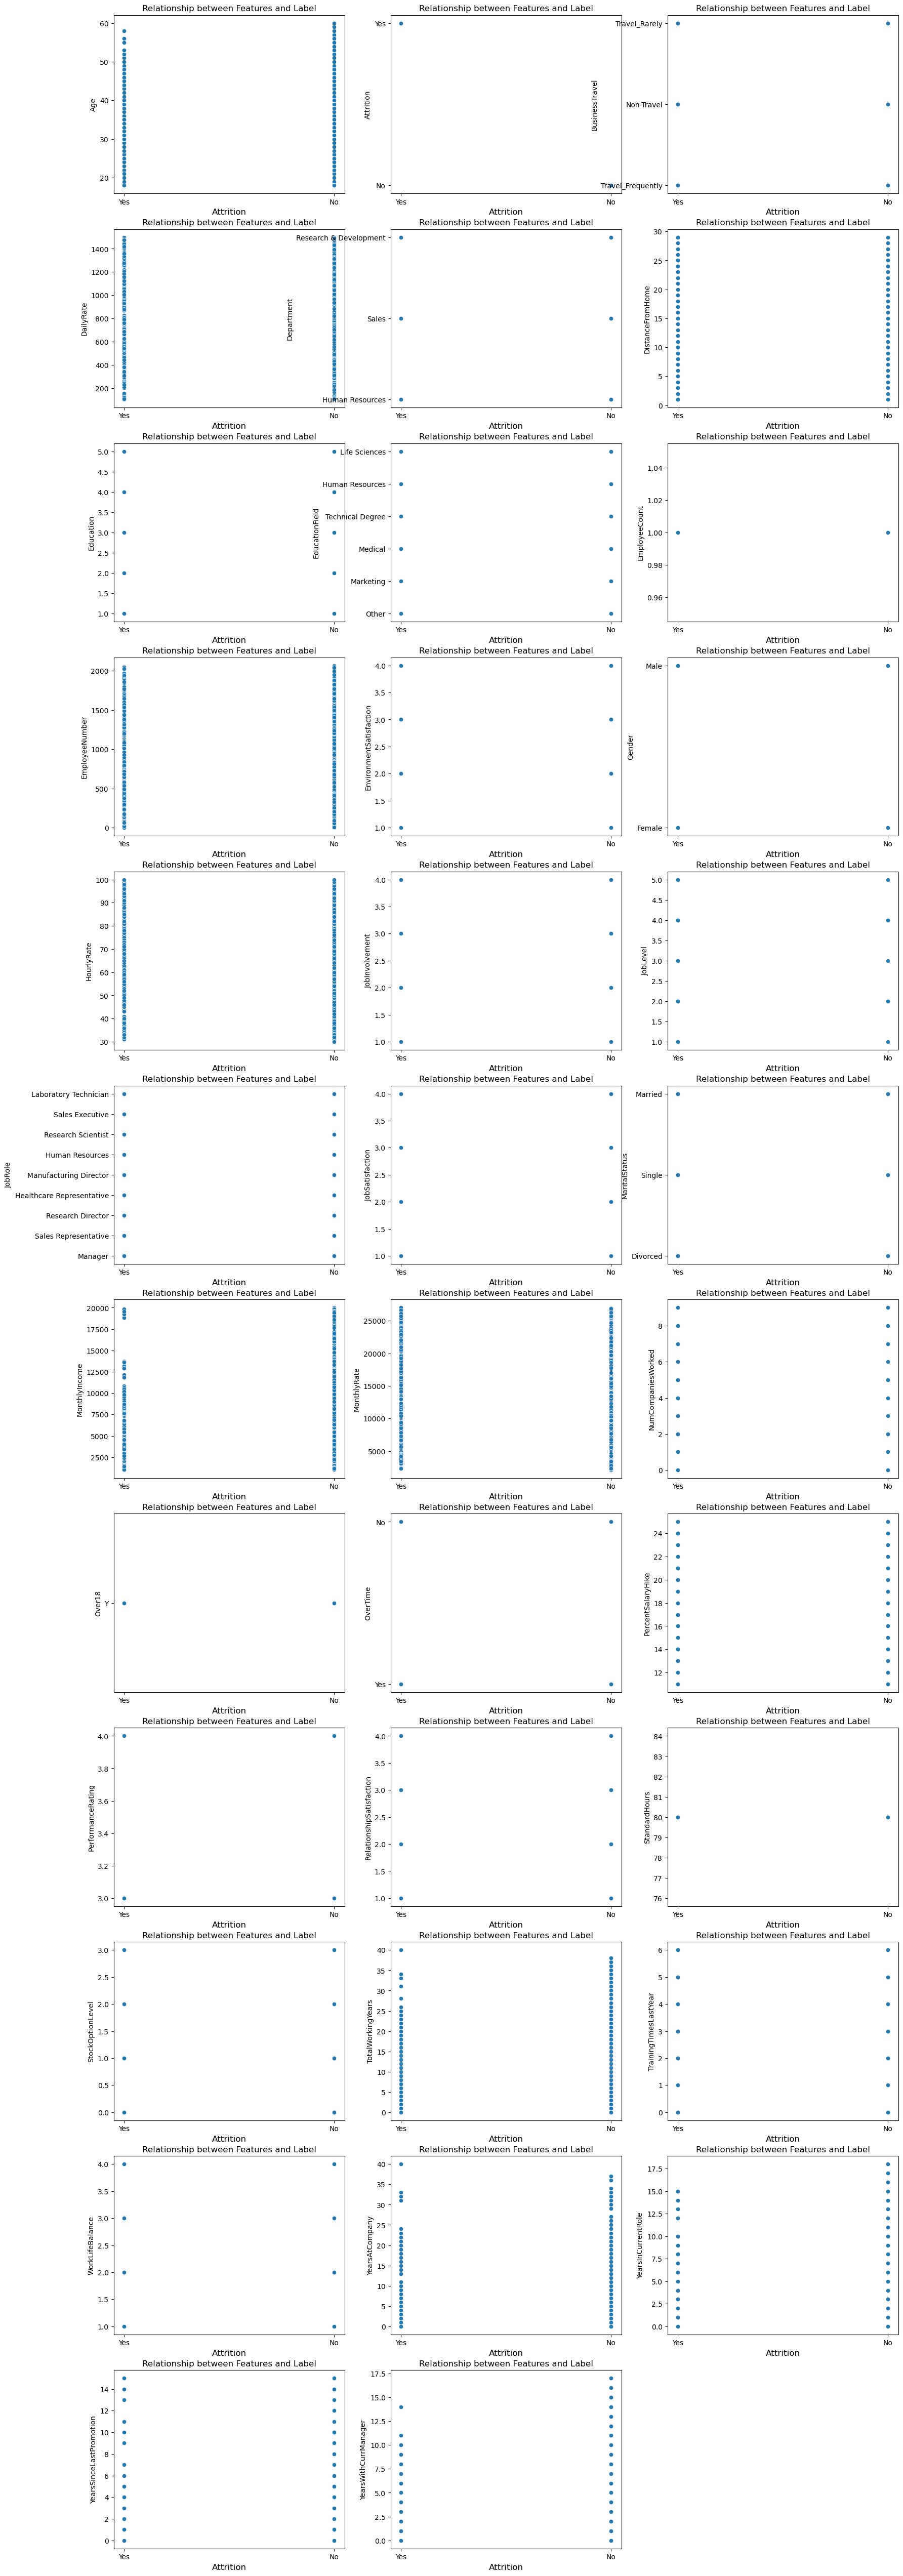

In [54]:
# Plotting scatter plot to check relationship between label and features
plt.figure(figsize =(20, 65))
plotnumber =1

for i in df:
    if plotnumber <= 35:
        plt.subplot(12, 3, plotnumber)
        sns.scatterplot(x ='Attrition', y =i, data =df)
        plt.xlabel("Attrition", fontsize =12)
        plt.ylabel(i)
        plt.title("Relationship between Features and Label")
    plotnumber +=1
plt.show()

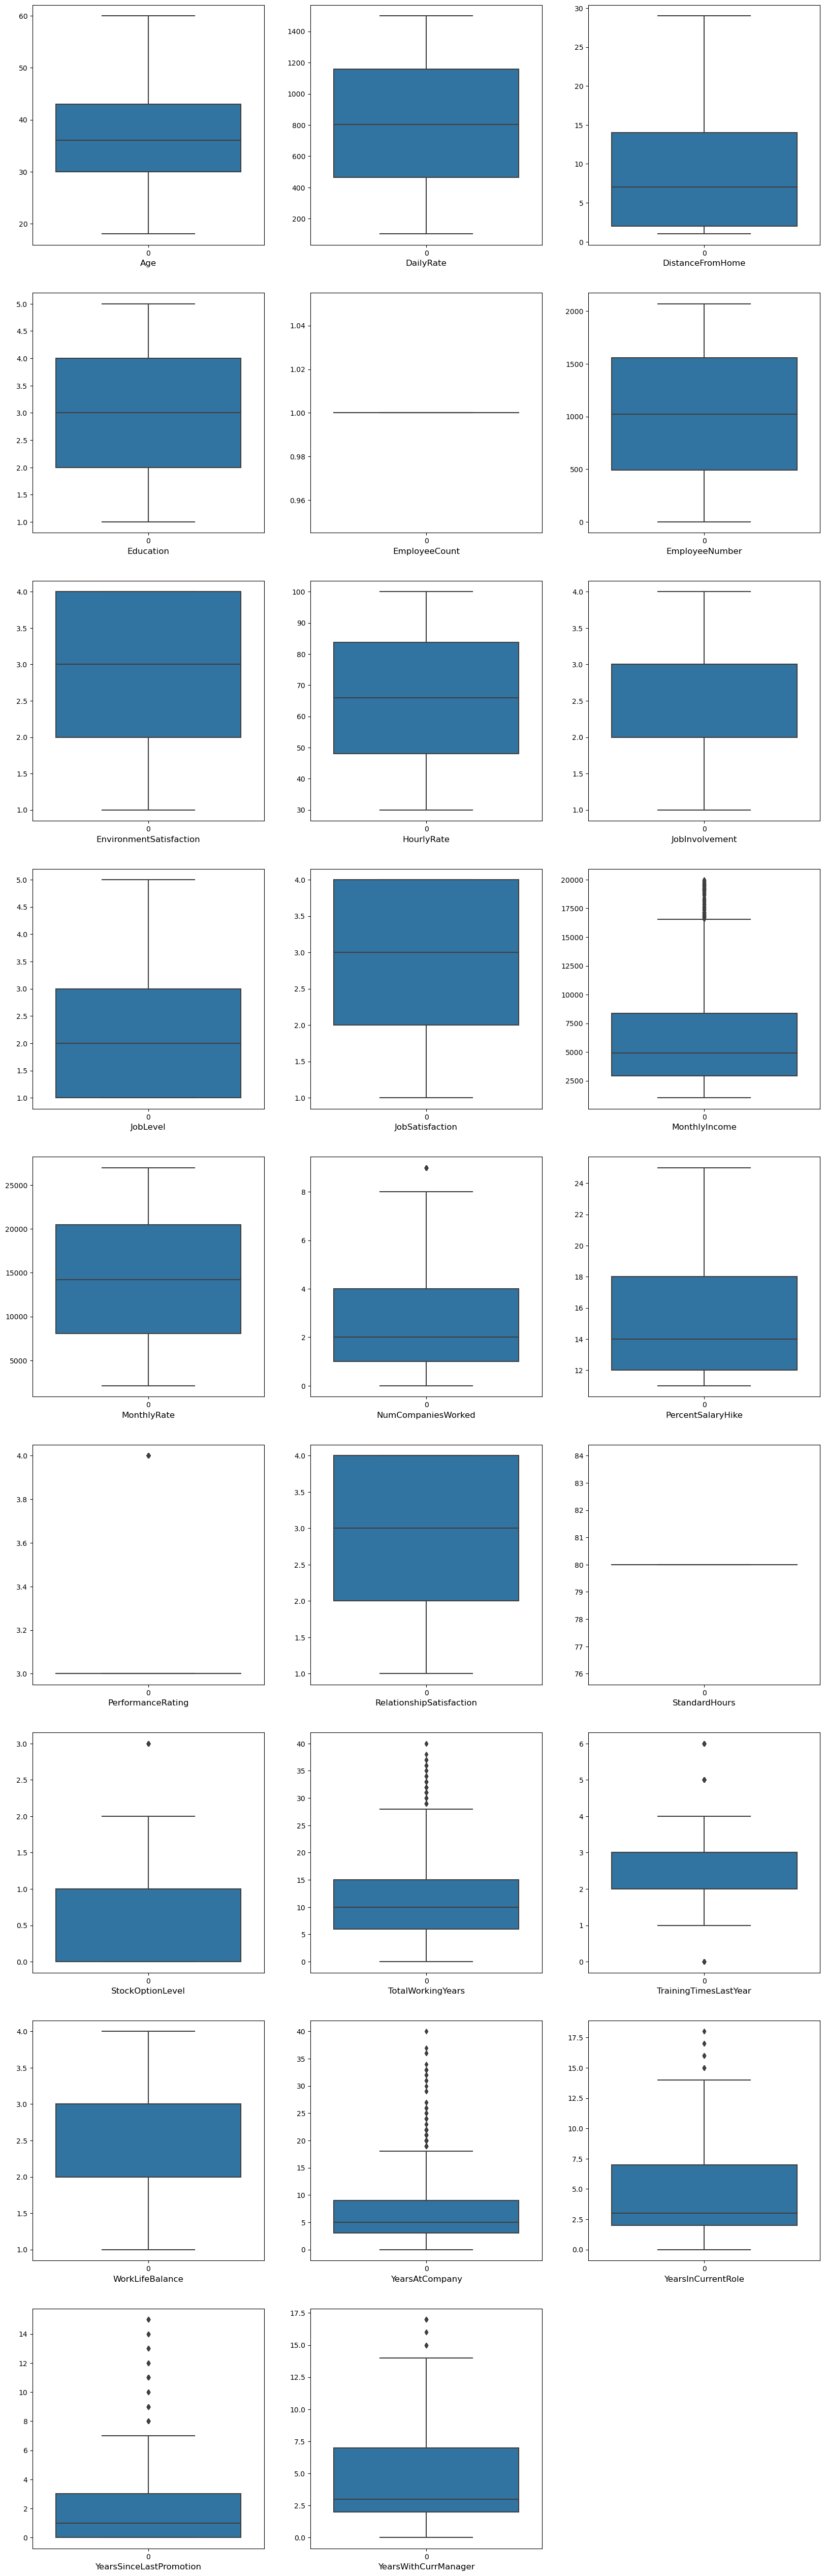

In [55]:
# Plotting Boxplot to check outliers
plt.figure(figsize =(20, 65))
plotnumber =1

for i in num_col:
    if plotnumber <= 26:
        plt.subplot(9, 3, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize =12)
    plotnumber+=1
plt.show()

In [56]:
# Removing outliers using IQR method
df_iqr =df[['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating']]

Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR =Q3-Q1

#For Higher Side
for i in df_iqr:
    high_iqr =Q3[i] + (1.5 * IQR[i])
    high_index =(np.where(df_iqr[i] > high_iqr))
    df_iqr =df_iqr.drop(df_iqr.index[high_index])
    
#For Lower Side
for i in df_iqr:
    low_iqr =Q1[i] - (1.5 * IQR[i])
    low_index =np.where(df_iqr[i] < low_iqr)
    df_iqr =df_iqr.drop(df_iqr.index[low_index])

In [57]:
# Removing outliers using zscore method
df_zscore =df[['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating']]
z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis =1)]

In [58]:
# Checing data loss after using IQR and zscore
print("Shape of original dataset :", df.shape[0])
print('\n')
print("Shape of dataset after removing outliers by using IQR method :",df_iqr.shape[0])
print("Data Loss :",((df.shape[0] - df_iqr.shape[0])/df.shape[0])*100)
print('\n')
print("Shape of dataset after removing outliers by using Zscore method :",df_zscore.shape[0])
print("Data Loss :",((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Shape of original dataset : 1470


Shape of dataset after removing outliers by using IQR method : 1101
Data Loss : 25.102040816326532


Shape of dataset after removing outliers by using Zscore method : 1470
Data Loss : 0.0


In [59]:
df_zscore.shape

(1470, 3)

__Data loss after using IQR method is 25% and using zscore is 0%. So will not remove any outliers.__

In [60]:
# Checking skewness
df[num_col].skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [61]:
# Removing skewnessl using log method
df['DistanceFromHome'] =np.log(df['DistanceFromHome'])
df['JobLevel'] =np.log(df['JobLevel'])
df['MonthlyIncome'] =np.log(df['MonthlyIncome'])
df['NumCompaniesWorked'] =np.log(df['NumCompaniesWorked']+1)
df['PercentSalaryHike'] = np.log(df['PercentSalaryHike'])
df['PerformanceRating'] =np.log(df['PerformanceRating'])
df['StockOptionLevel'] =np.log(df['StockOptionLevel']+1)
df['TotalWorkingYears'] =np.log(df['TotalWorkingYears']+1)
df['YearsAtCompany'] =np.log(df['YearsAtCompany']+1)
df['YearsInCurrentRole'] =np.log(df['YearsInCurrentRole']+1)
df['YearsSinceLastPromotion'] =np.log(df['YearsSinceLastPromotion']+1)
df['YearsWithCurrManager'] =np.log(df['YearsWithCurrManager']+1)

In [62]:
# Again Checking skewness
df[num_col].skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.246004
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.219763
JobSatisfaction            -0.329672
MonthlyIncome               0.286192
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.494566
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [63]:
#Again removing skewness of "PerformanceRating"
df['PerformanceRating'] =np.cbrt(df['PerformanceRating'])

In [64]:
# Again Checking skewness
df[num_col].skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.246004
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.219763
JobSatisfaction            -0.329672
MonthlyIncome               0.286192
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.494566
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [67]:
# Encoding Categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE =OrdinalEncoder()

for i in df:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
939,32,1.0,2.0,1089,1.0,1.945910,2,1.0,1,1309,...,1,80,0.693147,2.397895,3,3,2.397895,1.609438,0.693147,0.693147
705,39,0.0,2.0,903,2.0,0.693147,5,1.0,1,985,...,4,80,0.000000,2.302585,3,3,2.197225,2.079442,0.000000,2.079442
864,41,1.0,0.0,906,1.0,1.609438,2,1.0,1,1210,...,1,80,0.693147,1.791759,2,1,0.693147,0.000000,0.000000,0.000000
865,30,0.0,2.0,1329,2.0,3.367296,4,1.0,1,1211,...,3,80,1.386294,2.197225,3,3,1.609438,1.386294,0.000000,1.386294
1289,38,0.0,0.0,1336,0.0,0.693147,3,0.0,1,1805,...,4,80,1.386294,2.639057,3,3,2.484907,2.397895,1.386294,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,34,0.0,2.0,937,2.0,0.000000,3,2.0,1,1950,...,1,80,0.000000,2.708050,3,2,2.708050,2.197225,1.098612,0.693147
392,54,0.0,2.0,821,1.0,1.609438,2,3.0,1,522,...,3,80,0.693147,3.218876,4,2,1.609438,1.098612,0.693147,1.098612
70,59,0.0,1.0,1225,2.0,0.000000,1,1.0,1,91,...,4,80,0.000000,3.044522,2,2,1.609438,1.386294,0.693147,1.386294
532,47,0.0,2.0,703,2.0,2.639057,4,2.0,1,728,...,4,80,0.000000,3.044522,2,3,2.079442,2.079442,0.693147,2.079442


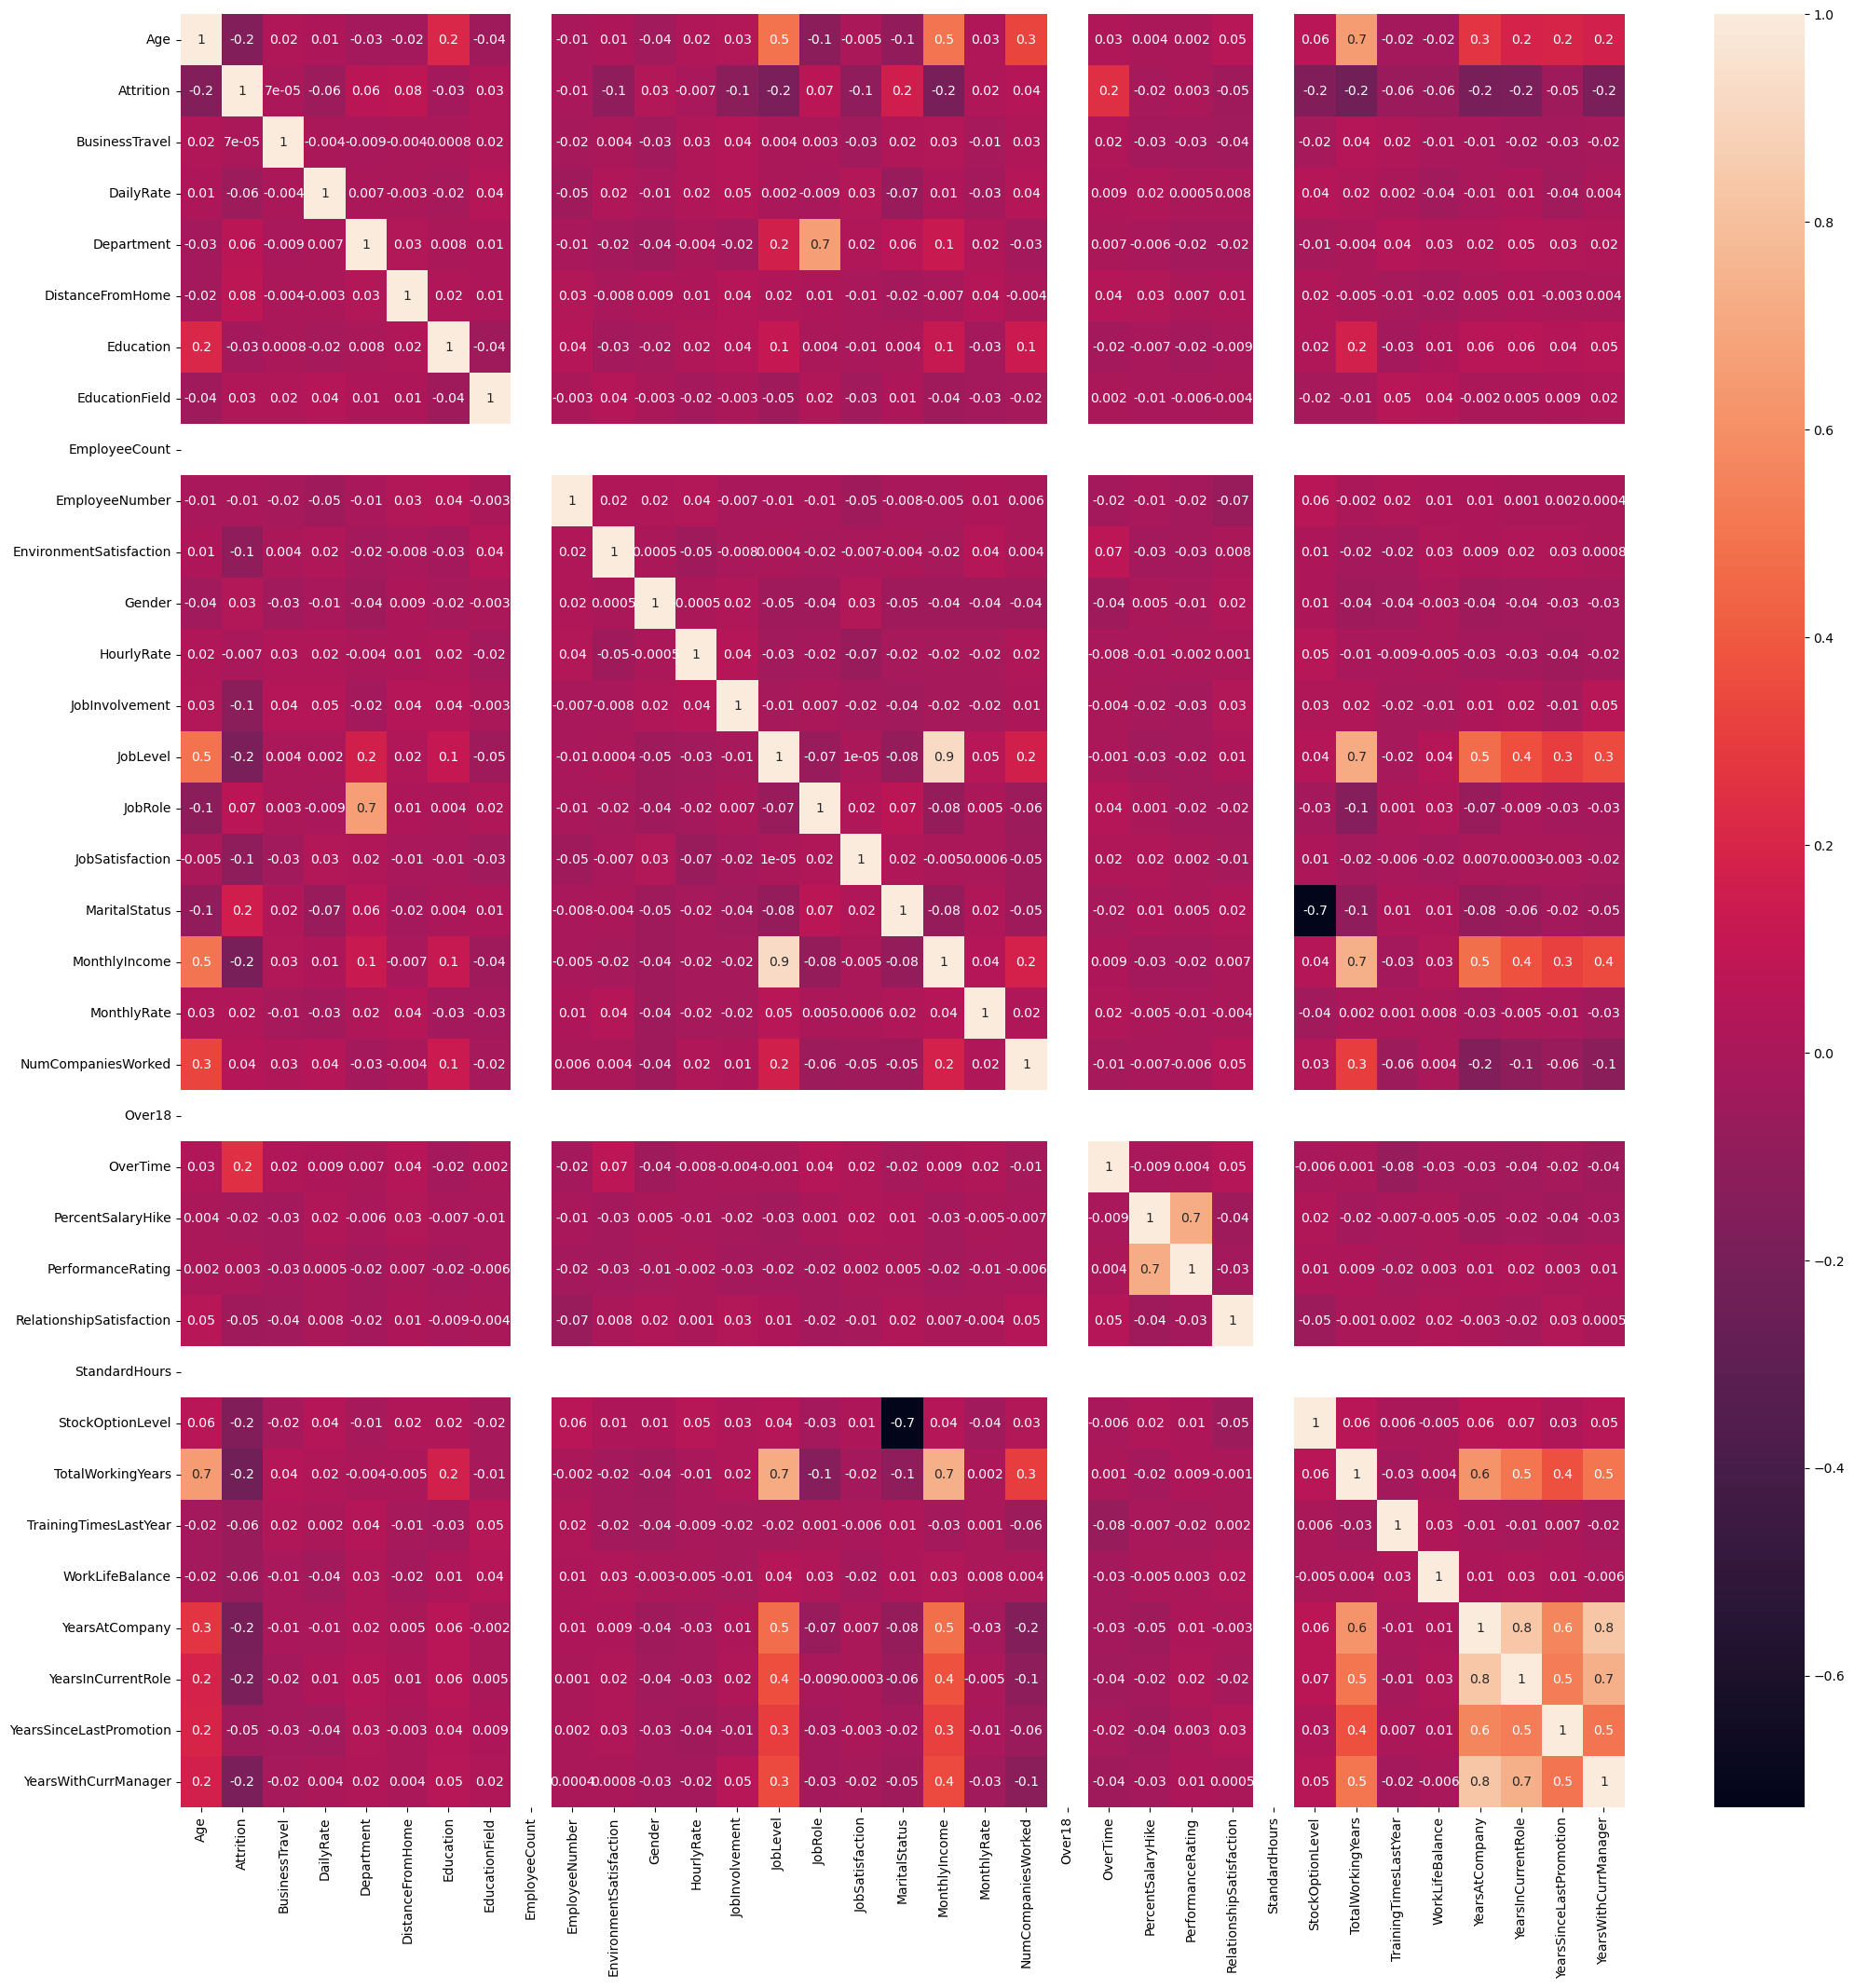

In [70]:
# Plotting heat map
plt.figure(figsize =(25, 25))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__We found multicollinearity between "Joblevel" and "MonthlyIncome"

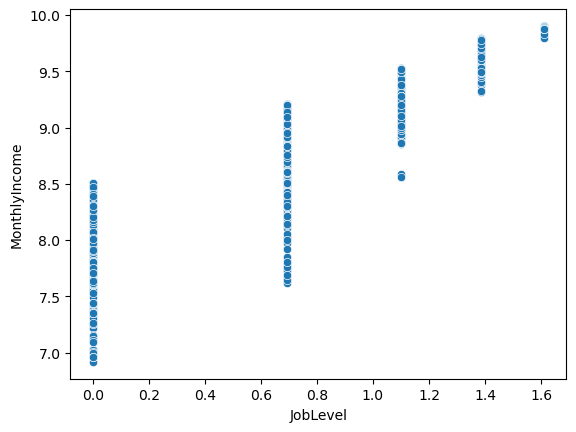

In [72]:
sns.scatterplot(x ='JobLevel', y ='MonthlyIncome', data =df)
plt.show()

In [73]:
# We will delete joblevel
df.drop(columns =['JobLevel'], inplace =True)

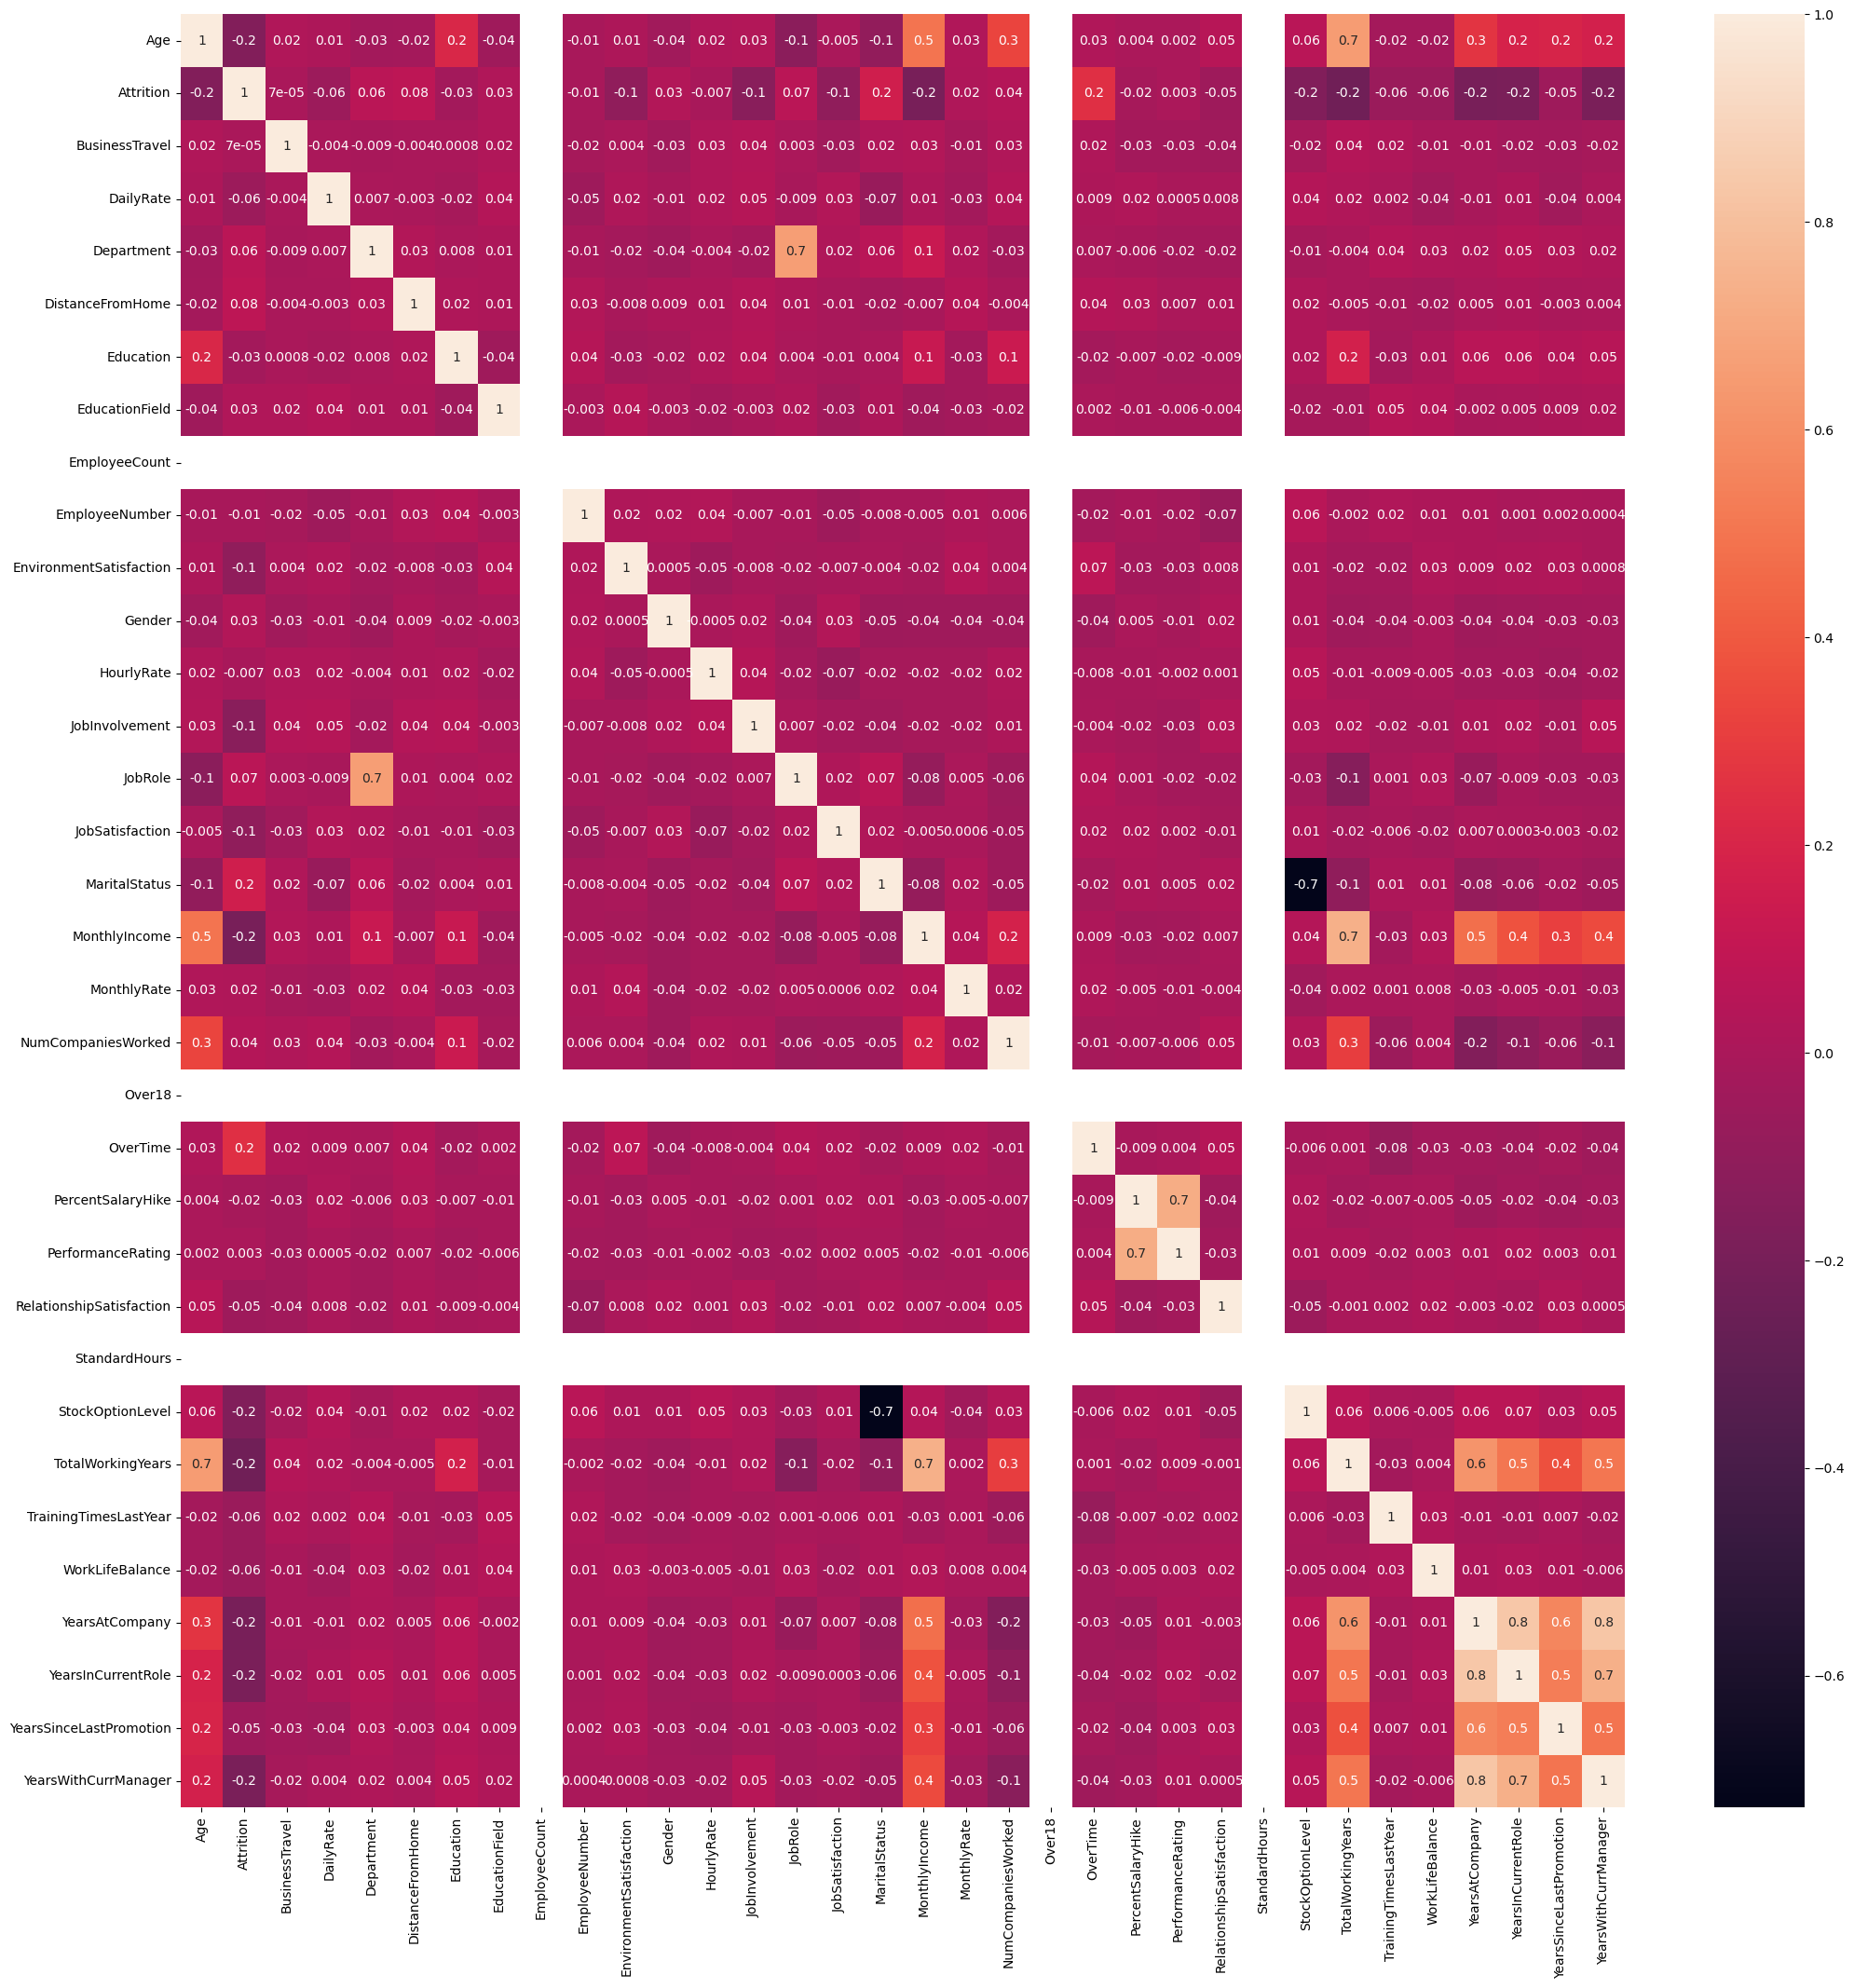

In [74]:
# Again Plotting heat map
plt.figure(figsize =(25, 25))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__We found multicollinearity between 
1. "YearsInCurrentRole" and "YearsAtCompany"
2. "YearsWithCurrentManager" and "YearsAtCompany"

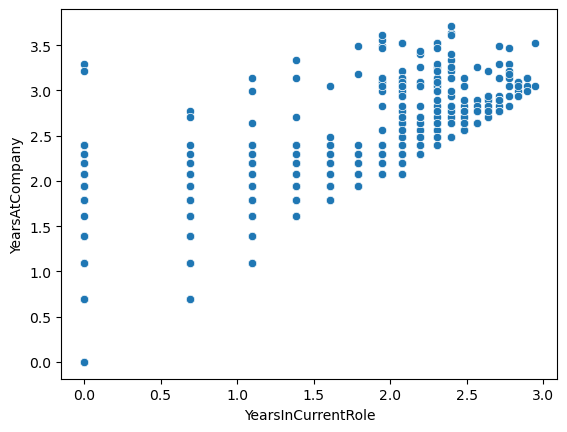

In [75]:
sns.scatterplot(x ='YearsInCurrentRole', y ='YearsAtCompany', data =df)
plt.show()

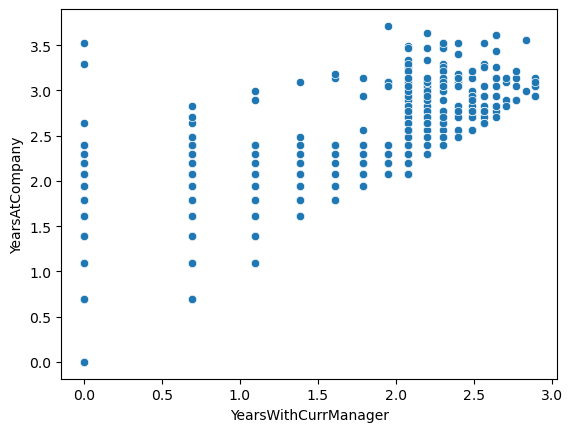

In [77]:
sns.scatterplot(x ='YearsWithCurrManager', y ='YearsAtCompany', data =df)
plt.show()

In [78]:
# We will delete "YearAtCompany"
df.drop(columns =['YearsAtCompany'], inplace =True)

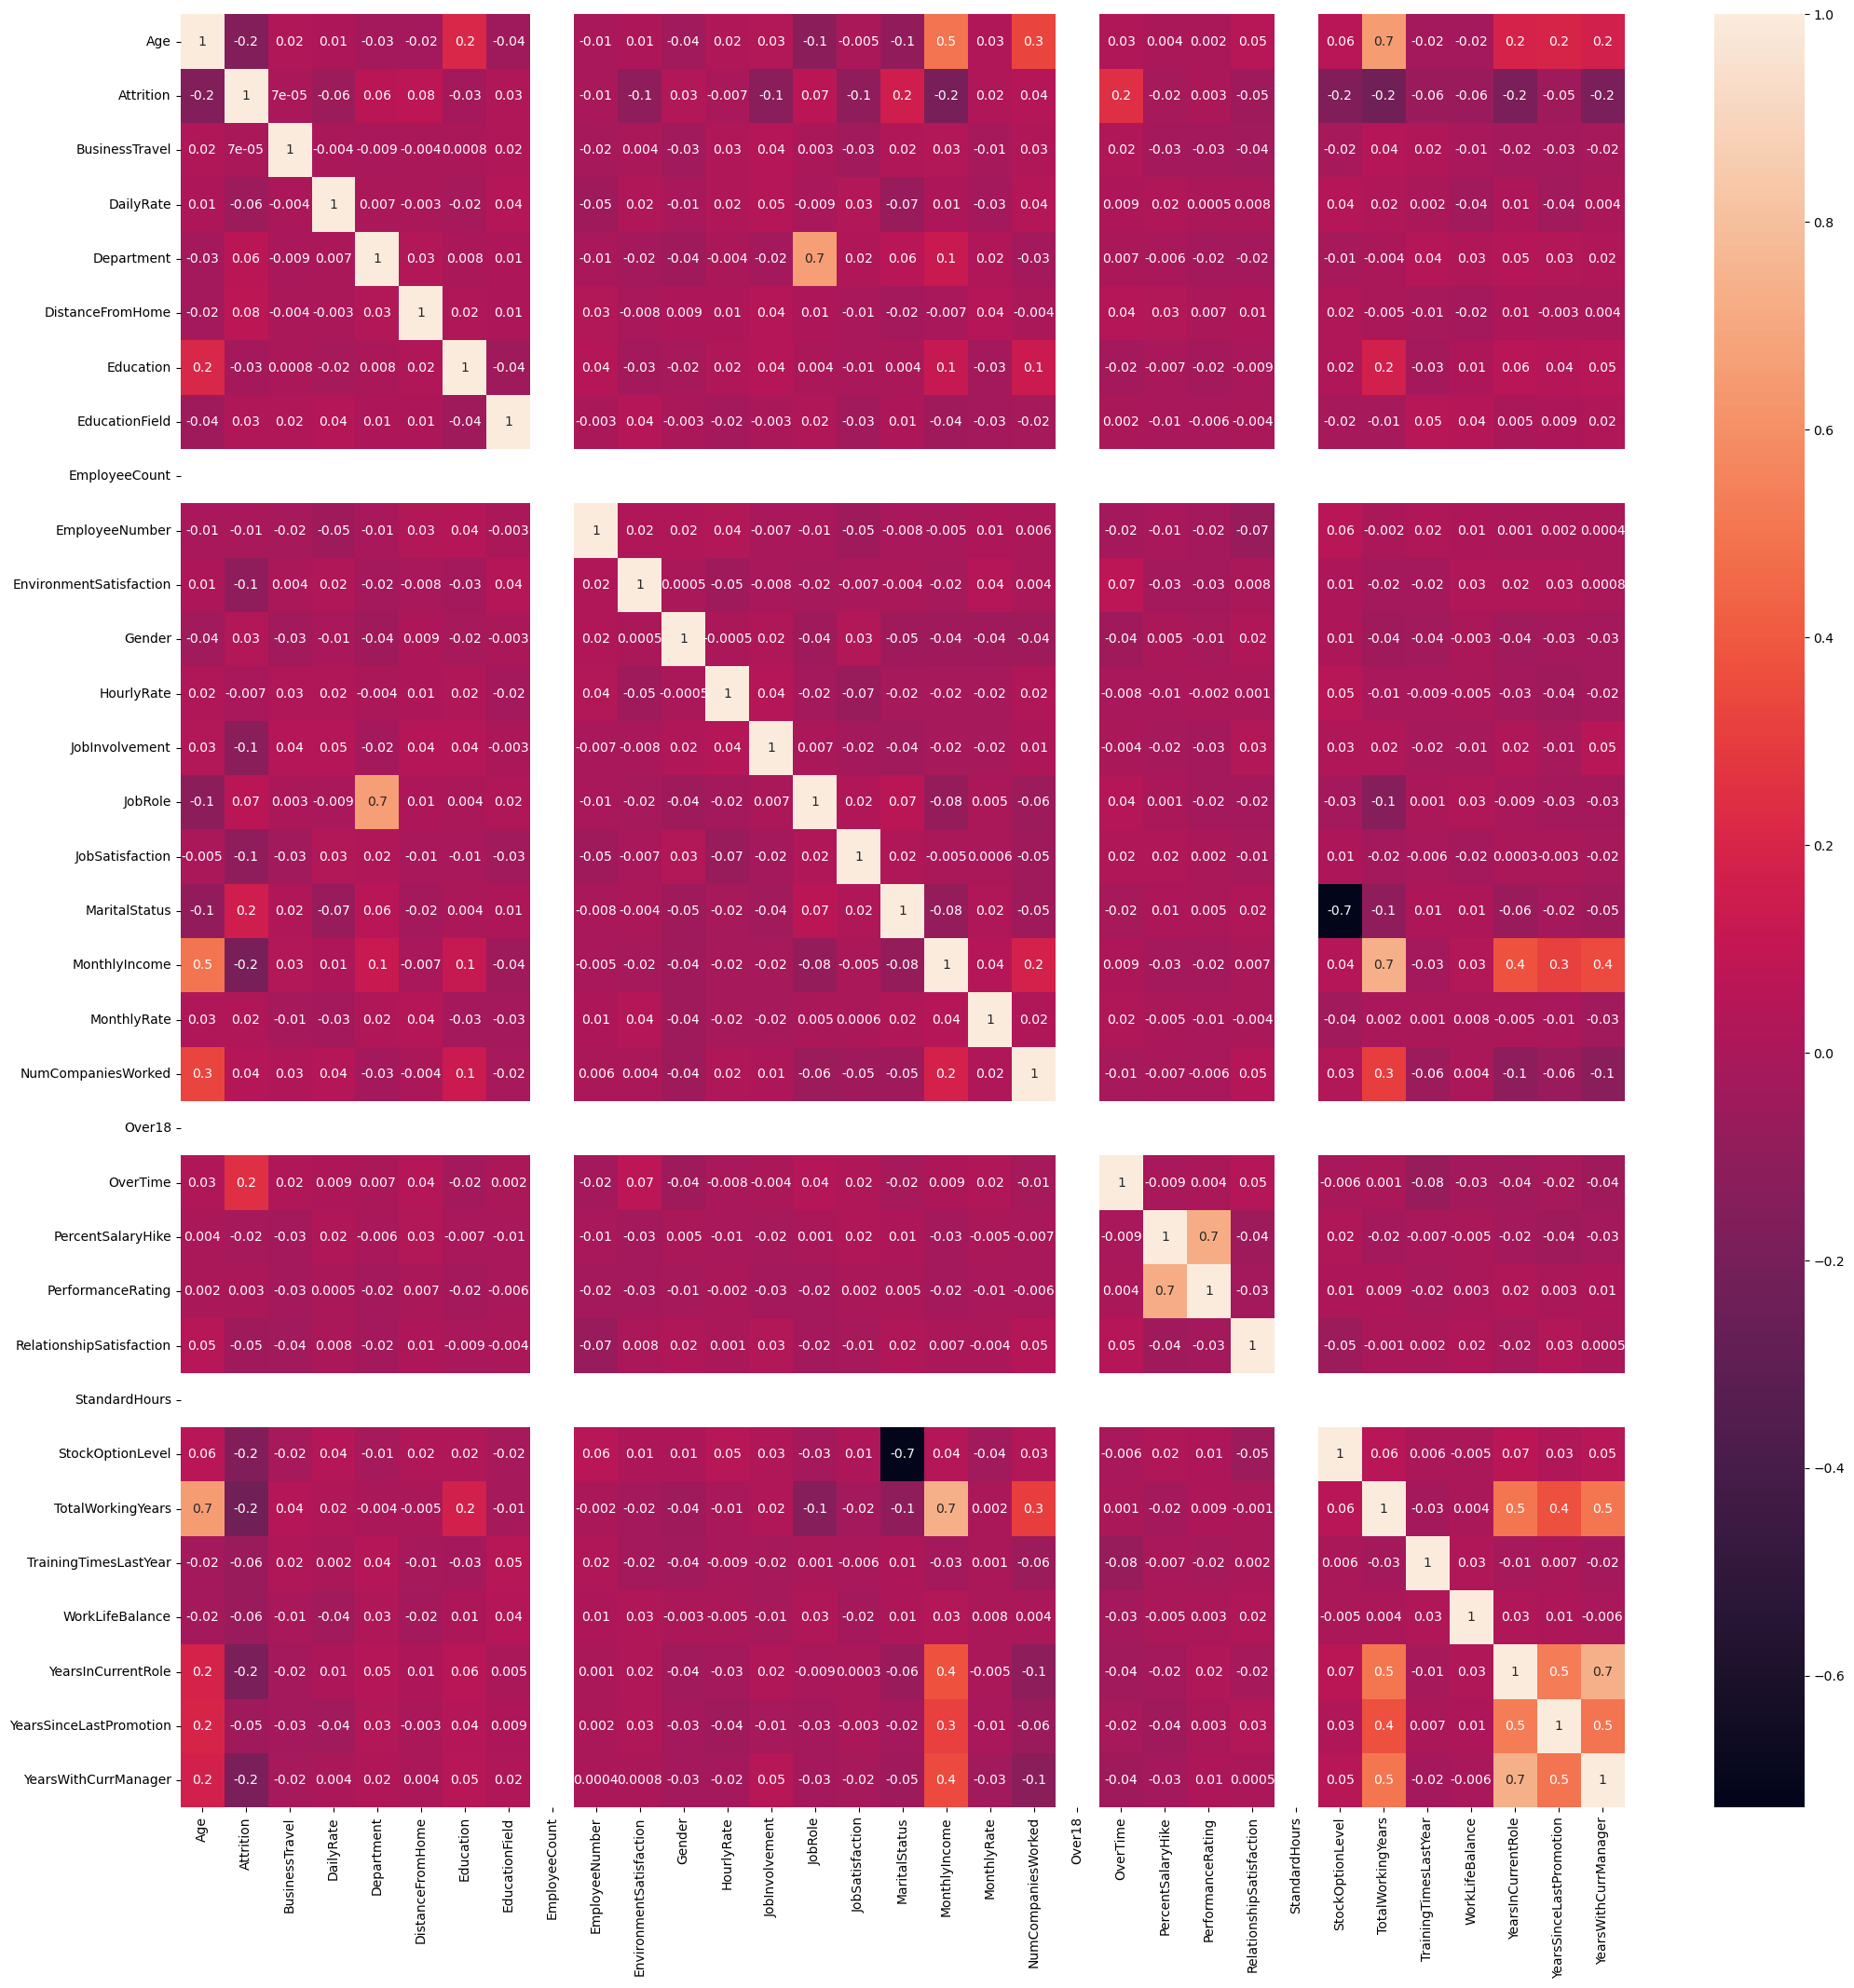

In [79]:
# Again Plotting heat map
plt.figure(figsize =(25, 25))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

In [80]:
# Seperatng Features and Label
x =df.drop(columns =['Attrition'])
y =df[['Attrition']]

In [83]:
# Data Standardization
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)

In [84]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.539166,0.590048,0.710298,-0.493817,0.191331,-0.891688,-0.937414,0.0,0.472126,1.169781,...,-0.426230,-1.584178,0.0,0.471284,0.148411,0.155707,0.338096,0.290611,-0.117271,-0.815054
1,0.227347,0.590048,0.249185,1.401512,-0.990702,2.038524,-0.937414,0.0,-0.066241,-1.575686,...,-0.426230,1.191438,0.0,-1.056106,0.011941,0.155707,0.338096,0.882670,-0.973342,0.904924
2,0.446350,-2.416437,0.256622,-0.493817,-0.126144,-0.891688,-0.937414,0.0,0.307625,-1.575686,...,-0.426230,-1.584178,0.0,0.471284,-0.719489,-0.620189,-2.493820,-1.736783,-0.973342,-1.675043
3,-0.758170,0.590048,1.305283,1.401512,1.532467,1.061787,-0.937414,0.0,0.309287,0.254625,...,-0.426230,0.266233,0.0,1.998674,-0.138921,0.155707,0.338096,0.009519,-0.973342,0.044935
4,0.117845,-2.416437,1.322636,-2.389147,-0.990702,0.085049,-1.688776,0.0,1.296293,-1.575686,...,-0.426230,1.191438,0.0,1.998674,0.493721,0.155707,0.338096,1.283824,0.738799,1.051057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.320163,0.590048,0.333475,1.401512,-1.644714,0.085049,-0.186052,0.0,1.537229,-1.575686,...,2.346151,-1.584178,0.0,-1.056106,0.592509,0.155707,-1.077862,1.031041,0.383498,-0.815054
1466,1.869874,0.590048,0.045899,-0.493817,-0.126144,-0.891688,0.565311,0.0,-0.835575,-1.575686,...,-0.426230,0.266233,0.0,0.471284,1.323938,0.931603,-1.077862,-0.352871,-0.117271,-0.311993
1467,2.417384,-0.913194,1.047456,1.401512,-1.644714,-1.868426,-0.937414,0.0,-1.551736,-1.575686,...,-0.426230,1.191438,0.0,-1.056106,1.074289,-0.620189,-1.077862,0.009519,-0.117271,0.044935
1468,1.103362,0.590048,-0.246635,1.401512,0.845344,1.061787,-0.186052,0.0,-0.493280,1.169781,...,-0.426230,1.191438,0.0,-1.056106,1.074289,-0.620189,0.338096,0.882670,-0.117271,0.904924


In [85]:
# Checking variance inflaction factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] =x.columns
vif

,VIF Values,Feature
0,1.953550,Age
1,1.015188,BusinessTravel
2,1.022295,DailyRate
3,1.921817,Department
4,1.012545,DistanceFromHome
5,1.066166,Education
6,1.016402,EducationField
7,NaN,EmployeeCount
8,1.022887,EmployeeNumber
9,1.020228,EnvironmentSatisfaction


__VIF score for all the columns are less than 5, so we will not delete any column

In [86]:
# Balancing dataset

SM =SMOTE()
x1, y1 =SM.fit_resample(x, y)

In [87]:
# Checking Shape of features and labels
print("Shape of features :", x1.shape)
print("Shape of label :", y1.shape)

Shape of features : (2466, 32)
Shape of label : (2466, 1)


In [88]:
# Checking value count of label after balancing dataset
y1.value_counts()

Attrition
0.0          1233
1.0          1233
Name: count, dtype: int64

# EDA Completed

## Model Building

### Finding best random state

In [95]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x1, y1, test_size =0.3, random_state =i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred =RFR.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum Accuracy is :",maxacc , "at random_state :", maxrs)

Maximum Accuracy is : 0.9648648648648649 at random_state : 167


In [96]:
x_train, x_test, y_train, y_test =train_test_split(x1, y1, test_size =0.3, random_state =maxrs)

In [97]:
RFR =RandomForestClassifier()
ETC =ExtraTreesClassifier()
LR =LogisticRegression()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DTC =DecisionTreeClassifier()

In [127]:
models ={'RandomForestClassifier': RFR,
        'ExtraTreesClassifier': ETC,
        'LogisticRegression': LR,
        'SVC': svc,
        'GradientBoostigClassifier': GBC,
        'AdaBoostClassifier': ABC,
        'BaggingClassifier': BC,
        'DecisionTreeClassifier': DTC}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print(name)
    print("Accuracy Score: ", acc*100)
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report :\n", classification_report(y_test, pred))
    
    print("\nCross Validation :")
    print("*"*20)
    score =cross_val_score(model, x1, y1)
    print(score)
    print(score.mean())
    print("Difference between accuracy score and cross validation is :", (acc-(score.mean()))*100)
    print('\n')
    print("="*50)
    print('\n')

RandomForestClassifier
Accuracy Score:  95.8108108108108
Confusion Matrix:
 [[357  15]
 [ 16 352]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       372
         1.0       0.96      0.96      0.96       368

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740


Cross Validation :
********************
[0.77327935 0.96957404 0.97565923 0.99188641 0.97565923]
0.937211651378407
Difference between accuracy score and cross validation is : 2.0896456729701085




ExtraTreesClassifier
Accuracy Score:  97.97297297297297
Confusion Matrix:
 [[362  10]
 [  5 363]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       372
         1.0       0.97      0.99      0.98       368

    accuracy                           0.98       740
   macro 

__Our best model is ExtraTressClassifier with the accuracy of 97.83%__

# Hyperparameter tunning

In [102]:
parameter ={'n_estimators' :[10, 20],
           'criterion': ['log_loss', 'entropy', 'gini'],
           'max_depth': [2, 8, 16],
           'min_samples_split' :[2, 4, 6],
           'min_samples_leaf' :[1, 2],
           'max_features' :['sqrt', 'log2']
           }

In [103]:
GCV =GridSearchCV(ExtraTreesClassifier(), parameter, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['log_loss', 'entropy', 'gini'],
                         'max_depth': [2, 8, 16],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20]})

In [104]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [133]:
Final_Model =ExtraTreesClassifier(criterion ='gini',
 max_depth =16,
 max_features = 'log2',
 min_samples_leaf =1,
 min_samples_split =2,
 n_estimators =120)

Final_Model.fit(x_train, y_train)
pred =Final_Model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy is:", acc*100)

Accuracy is: 98.37837837837839


__Accuracy increased after hyperparameter tunning.__

In [134]:
# Saving Model
pickle.dump(Final_Model, open('HR-Analytics.pkl', 'wb'))

In [135]:
# Loading the Model
loaded_model =pickle.load(open('HR-Analytics.pkl', 'rb'))
pred =loaded_model.predict(x_test)
result =loaded_model.score(x_test, y_test)
print(result*100)

98.37837837837839


In [136]:
#Comparing Actual Vs Predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,0.0,0.0
1,0.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
735,1.0,1.0
736,1.0,1.0
737,1.0,1.0
738,1.0,1.0
